# Import Libraries

In [15]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.decomposition import NMF
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
%matplotlib inline 
from nltk.stem.snowball import SnowballStemmer


def fetch_data(categories):
    return fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42), \
    fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)
    
categories = ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey']
twenty_train, twenty_test = fetch_data(categories)
print("Num of doc in train" ,len(twenty_train.data))
print("Num of doc in test"  ,len(twenty_test.data))
stop_words = text.ENGLISH_STOP_WORDS


Num of doc in train 4732
Num of doc in test 3150


# (a)

[584, 591, 590, 578, 594, 598, 597, 600]


Text(0.5,1,'Number of training documents')

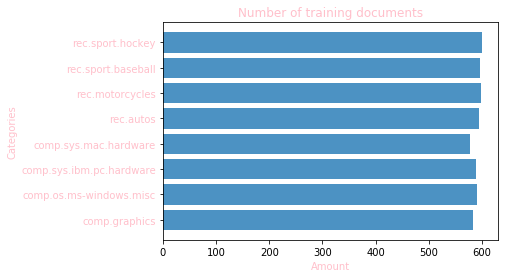

In [16]:
his = [0] * 8
for t in twenty_train.target:
     his[t] += 1
print(his)

x = np.arange(8)
plt.barh(x, his, alpha=0.8)
plt.yticks(x, twenty_train.target_names, color='pink')
plt.xlabel("Amount", color='pink')
plt.ylabel("Categories", color='pink')
plt.title('Number of training documents', color='pink')

# (b)

In [17]:
def Stemmer(Data):
    for i in range(len(Data)):
        Data[i] = ' '.join(map(SnowballStemmer("english").stem, CountVectorizer().build_analyzer()(Data[i])))

def Counter(min_df, train, test):
    # The default regexp select tokens of 2 or more alphanumeric characters 
    # punctuation is completely ignored and always treated as a token separator
    print("min_df =",min_df)
    Stemmer(train.data)
    Stemmer(test.data)
    
    count_vect = CountVectorizer(min_df=min_df, stop_words=stop_words)
    X_train_counts = count_vect.fit_transform(train.data)
    XX_train  = X_train_counts.toarray()
    print("Shape of train =",XX_train.shape)
    X_test_counts = count_vect.transform(test.data)
    XX_test  = X_test_counts.toarray()
    print("Shape of test =",XX_test.shape)
    return X_train_counts, X_test_counts

X_train_counts_2, X_test_counts_2 = Counter(2, twenty_train, twenty_test)
X_train_counts_5, X_test_counts_5 = Counter(5, twenty_train, twenty_test)

# 25343
# 10664

min_df = 2
Shape of train = (4732, 25434)
Shape of test = (3150, 25434)
min_df = 5
Shape of train = (4732, 10670)
Shape of test = (3150, 10670)


In [18]:
from sklearn.feature_extraction.text import TfidfTransformer
def tfidf(X_train_counts, X_test_counts):
    tfidf_transformer = TfidfTransformer()
    print(X_train_counts.shape)
    X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
    X_test_tfidf = tfidf_transformer.transform(X_test_counts)
    return X_train_tfidf, X_test_tfidf

X_train_tfidf_2, X_test_tfidf_2 = tfidf(X_train_counts_2, X_test_counts_2)
X_train_tfidf_5, X_test_tfidf_5 = tfidf(X_train_counts_5, X_test_counts_5)

print ("X_train_tfidf_2.shape =",X_train_tfidf_2.shape)
print ("X_test_tfidf_2.shape =",X_test_tfidf_2.shape)
print ("X_train_tfidf_5.shape =",X_train_tfidf_5.shape)
print ("X_test_tfidf_5.shape =",X_test_tfidf_5.shape)


# print("\n\n\n\n")
# print("train 2&5")
# print ('-' * 20)
# print ("X_train_counts_2.toarray")
# print (X_train_counts_2.toarray()[:30,:5])
# print ('-' * 20)
# print ("X_train_tfidf_2.toarray")
# print (X_train_tfidf_2.toarray()[:30,:5])

# print ('-' * 20)
# print ("X_train_counts_5.toarray")
# print (X_train_counts_5.toarray()[:30,:5])
# print ('-' * 20)
# print ("X_train_tfidf_5.toarray")
# print (X_train_tfidf_5.toarray()[:30,:5])


(4732, 25434)
(4732, 10670)
X_train_tfidf_2.shape = (4732, 25434)
X_test_tfidf_2.shape = (3150, 25434)
X_train_tfidf_5.shape = (4732, 10670)
X_test_tfidf_5.shape = (3150, 10670)


# (c)

In [19]:
twenty_all = fetch_20newsgroups(subset='all', shuffle=True, random_state=42)

print("Num of docs =" ,len(twenty_all.data))
his = [0] * 20
for t in twenty_all.target:
     his[t] += 1
print("The doc numbers of all classes =" ,his)

Stemmer(twenty_all.data)
count_vect_2 = CountVectorizer(min_df=2, stop_words=stop_words)
all_counts_2 = count_vect_2.fit_transform(twenty_all.data)

count_vect_5 = CountVectorizer(min_df=5, stop_words=stop_words)
all_counts_5 = count_vect_5.fit_transform(twenty_all.data)

print(all_counts_2.shape, all_counts_5.shape)

Num of docs = 18846
The doc numbers of all classes = [799, 973, 985, 982, 963, 988, 975, 990, 996, 994, 999, 991, 984, 990, 987, 997, 910, 940, 775, 628]
(18846, 60776) (18846, 26713)


In [20]:
all_tfidf_2 = TfidfTransformer().fit_transform(all_counts_2)
all_tfidf_5 = TfidfTransformer().fit_transform(all_counts_5)

In [21]:
def required_class(all_tfidf, target):
    ret = np.zeros((4, all_tfidf.shape[1]))
    for i in range(all_tfidf.shape[0]):
        if target[i] == 3:
            ret[0,:] += all_tfidf[i, :]
            continue
        if target[i] == 4:
            ret[1,:] += all_tfidf[i, :]
            continue
        if target[i] == 6:
            ret[2,:] += all_tfidf[i, :]
            continue
        if target[i] == 15:
            ret[3,:] += all_tfidf[i, :]
            continue
    return ret

r_classes_2_tfidf = required_class(all_tfidf_2, twenty_all.target)
r_classes_5_tfidf = required_class(all_tfidf_5, twenty_all.target)

In [22]:
def pname(c, v):
    for i in range(4):
        S = sorted(range(c.shape[1]), key=lambda j: c[i][j])[-10:]
        for s in reversed(S):
            print(v.get_feature_names()[s], end=" ")
        print()
        
pname(r_classes_2_tfidf, count_vect_2)
pname(r_classes_5_tfidf, count_vect_5)

drive scsi card ide edu com bus use pc monitor 
mac edu appl monitor drive problem simm use centri quadra 
sale edu 00 offer ship sell line univers drive forsal 
god christian church jesus sin edu christ bibl rutger believ 
drive scsi card ide edu com bus use monitor pc 
mac edu appl monitor drive problem simm use centri quadra 
sale edu 00 offer ship sell line univers drive organ 
god christian church jesus sin edu christ bibl rutger believ 


# (d)

In [23]:
def SVD(X_train_tfidf, X_test_tfidf):
    from sklearn.decomposition import TruncatedSVD
    svd = TruncatedSVD(n_components=50)
    W_train_svd = svd.fit_transform(X_train_tfidf)
    W_test_svd = svd.transform(X_test_tfidf)
    return W_train_svd, W_test_svd

W_train_svd_2, W_test_svd_2 = SVD(X_train_tfidf_2, X_test_tfidf_2)    
W_train_svd_5, W_test_svd_5 = SVD(X_train_tfidf_5, X_test_tfidf_5)    

def NMF(X_train_tfidf, X_test_tfidf):
    from sklearn.decomposition import NMF
    nmf = NMF(n_components=50, init='random', random_state=0)
    W_train_nmf = nmf.fit_transform(X_train_tfidf)
    W_test_nmf = nmf.transform(X_test_tfidf)
    return W_train_nmf, W_test_nmf

W_train_nmf_2, W_test_nmf_2 = NMF(X_train_tfidf_2, X_test_tfidf_2)    
W_train_nmf_5, W_test_nmf_5 = NMF(X_train_tfidf_5, X_test_tfidf_5)  

print("Dim of Train SVD, min_df=2 =",W_train_svd_2.shape)
print("Dim of Test SVD, min_df=2 =",W_test_svd_2.shape)
print("Dim of Train SVD, min_df=5 =",W_train_svd_5.shape)
print("Dim of Test SVD, min_df=5 =",W_test_svd_5.shape)
print("Dim of Train NMF =",W_train_nmf_2.shape)
print("Dim of Test NMF =",W_test_nmf_2.shape)



Dim of Train SVD, min_df=2 = (4732, 50)
Dim of Test SVD, min_df=2 = (3150, 50)
Dim of Train SVD, min_df=5 = (4732, 50)
Dim of Test SVD, min_df=5 = (3150, 50)
Dim of Train NMF = (4732, 50)
Dim of Test NMF = (3150, 50)


In [24]:
print("train")
print("SVD")
print(W_train_svd_2[0])
print("NMF")
print(W_train_nmf_2[0])
print("test")
print("SVD")
print(W_test_svd_2[0])
print("NMF")
print(W_test_nmf_2[0])

train
SVD
[ 0.12980208  0.09599214  0.02898616  0.0085614  -0.06238681 -0.00664032
 -0.09053455  0.05765346 -0.00358627 -0.03878753  0.00467269 -0.00130527
  0.02575964  0.03740452  0.0341064   0.0029393  -0.00070777  0.00609904
  0.03380215 -0.03091385  0.00782942  0.00311354  0.01294871  0.00740769
 -0.00485525 -0.02329899 -0.00378364  0.04484294  0.02613887  0.04479541
  0.01486184  0.00241406 -0.02390873  0.0106646   0.01731997  0.02937949
  0.02811258  0.04148956  0.02548362 -0.02102665 -0.04107355 -0.02997635
 -0.02028218 -0.00338565  0.02847255 -0.00538409 -0.03369836  0.00307348
 -0.01459683 -0.0491881 ]
NMF
[6.65189778e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 8.08333262e-04 1.67852603e-04 3.27185421e-03
 8.86381559e-06 0.00000000e+00 0.00000000e+00 9.14291886e-03
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.0000000

# Prepare Y

In [25]:
Com_Tech = set(('comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware'))

train_Y = np.array([twenty_train.target_names[_] not in Com_Tech for _ in twenty_train.target]).astype(int)
ones, zeros = np.count_nonzero(train_Y), len(train_Y) - np.count_nonzero(train_Y)

print("# of 0 : 1 = ", zeros, ones)

test_Y = np.array([twenty_test.target_names[_] not in Com_Tech for _ in twenty_test.target]).astype(int)
ones, zeros = np.count_nonzero(test_Y), len(test_Y) - np.count_nonzero(test_Y)

print("# of 0 : 1 = ", zeros, ones)

print(train_Y[:10],twenty_train.target[:10],[twenty_train.target_names[i] for i in twenty_train.target[:10]])


# of 0 : 1 =  2343 2389
# of 0 : 1 =  1560 1590
[1 1 1 0 0 0 0 1 1 0] [6 7 4 2 1 3 0 7 5 3] ['rec.sport.baseball', 'rec.sport.hockey', 'rec.autos', 'comp.sys.ibm.pc.hardware', 'comp.os.ms-windows.misc', 'comp.sys.mac.hardware', 'comp.graphics', 'rec.sport.hockey', 'rec.motorcycles', 'comp.sys.mac.hardware']


# Measurement

In [26]:
def plot_roc(test_Y, prob_score):
    from sklearn.metrics import auc
    from sklearn.metrics import roc_curve
    fpr, tpr, _ = roc_curve(test_Y, prob_score[:,1])

    fig, ax = plt.subplots()

    roc_auc = auc(fpr,tpr)

    ax.plot(fpr, tpr, lw=2, label= 'area under curve = %0.4f' % roc_auc)

    ax.grid(color='0.7', linestyle='--', linewidth=1)

    ax.set_xlim([-0.1, 1.1])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate',fontsize=15)
    ax.set_ylabel('True Positive Rate',fontsize=15)

    ax.legend(loc="lower right")

    for label in ax.get_xticklabels()+ax.get_yticklabels():
        label.set_fontsize(15)
    
def confusion_matrix(test_Y, predict_Y):
    from sklearn.metrics import confusion_matrix
    return confusion_matrix(test_Y, predict_Y)

def accuracy(test_Y, predict_Y):
    from sklearn.metrics import accuracy_score
    return accuracy_score(test_Y, predict_Y)

def recall(test_Y, predict_Y):
    from sklearn.metrics import recall_score
    return recall_score(test_Y, predict_Y, average='binary')

def precision(test_Y, predict_Y):
    from sklearn.metrics import precision_score
    return precision_score(test_Y, predict_Y, average='binary')

def measurement(prob_score, test_Y, predict_Y):
    plot_roc(test_Y, prob_score)
    print(confusion_matrix(test_Y, predict_Y))
    print("accuracy = ", accuracy(test_Y, predict_Y))
    print("recall = ", recall(test_Y, predict_Y))
    print("precision = ", precision(test_Y, predict_Y))

# (e)

LSI, min_df=2
Hard margin SVM
[[1547   13]
 [ 146 1444]]
accuracy =  0.9495238095238095
recall =  0.9081761006289308
precision =  0.9910775566231984
--------------------
Soft margin SVM
[[1364  196]
 [   8 1582]]
accuracy =  0.9352380952380952
recall =  0.9949685534591195
precision =  0.889763779527559
--------------------
LSI, min_df=5
Hard margin SVM
[[1354  206]
 [   4 1586]]
accuracy =  0.9333333333333333
recall =  0.9974842767295597
precision =  0.8850446428571429
--------------------
Soft margin SVM
[[1378  182]
 [   9 1581]]
accuracy =  0.9393650793650794
recall =  0.9943396226415094
precision =  0.8967668746454907
--------------------
NMF, min_df=2
Hard margin SVM
[[1524   36]
 [  90 1500]]
accuracy =  0.96
recall =  0.9433962264150944
precision =  0.9765625
--------------------
Soft margin SVM
[[   9 1551]
 [   0 1590]]
accuracy =  0.5076190476190476
recall =  1.0
precision =  0.5062082139446036
--------------------


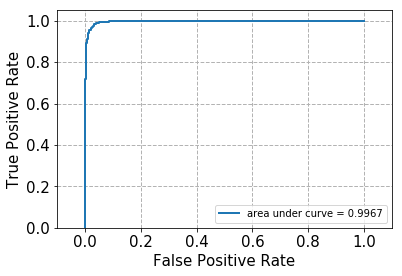

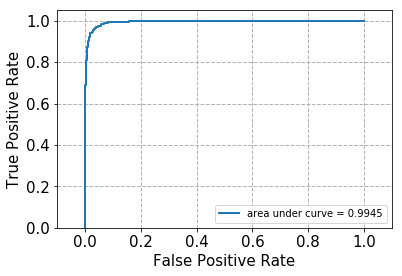

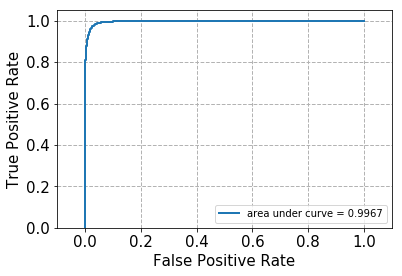

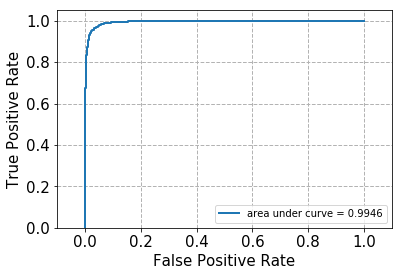

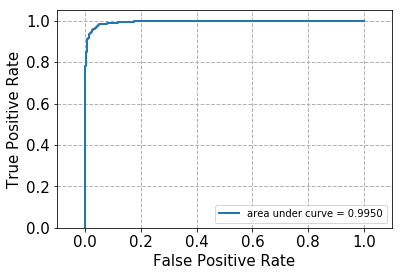

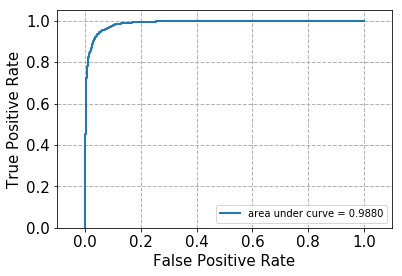

In [27]:
def SVM(train_X, train_Y, test_X, test_Y):
    from sklearn import svm
    print("Hard margin SVM")
    #clf = svm.SVC(kernel='linear', C=1000, probability=True)
    clf = svm.LinearSVC(C=1000)
    clf.fit(train_X, train_Y)
    predict_Y = clf.predict(test_X)
    prob_score = np.vstack((np.zeros(len(test_X)), clf.decision_function(test_X))).T
    #prob_score = clf.predict_proba(test_X)
    measurement(prob_score, test_Y, predict_Y)
    print('-'*20)
    print("Soft margin SVM")
    #clf = svm.SVC(kernel='linear', C=0.001, probability=True)
    clf = svm.LinearSVC(C=0.001)
    clf.fit(train_X, train_Y)
    predict_Y = clf.predict(test_X)
    prob_score = np.vstack((np.zeros(len(test_X)), clf.decision_function(test_X))).T
    #prob_score = clf.predict_proba(test_X)
    measurement(prob_score, test_Y, predict_Y)
    print('-'*20)

print("LSI, min_df=2")
SVM(W_train_svd_2, train_Y, W_test_svd_2, test_Y)
print("LSI, min_df=5")
SVM(W_train_svd_5, train_Y, W_test_svd_5, test_Y)
print("NMF, min_df=2")
SVM(W_train_nmf_2, train_Y, W_test_nmf_2, test_Y)

# (f)

LSI, min_df=2
-3 0.936392634594054
-2 0.9663992754741999
-1 0.9723155903677011
0 0.9740073706788669
1 0.9756969166133971
2 0.974006700932857
3 0.9702007524094407
K =  1
max_scores =  0.9756969166133971
[[1509   51]
 [  31 1559]]
accuracy =  0.9739682539682539
recall =  0.980503144654088
precision =  0.9683229813664597
--------------------
LSI, min_df=5
-3 0.939560756469968
-2 0.9655540560095949
-1 0.9699897833612624
0 0.9737950597762488
1 0.9752745306022484
2 0.9754868410323827
3 0.9661898696391955
K =  2
max_scores =  0.9754868410323827
[[1508   52]
 [  36 1554]]
accuracy =  0.9720634920634921
recall =  0.9773584905660377
precision =  0.9676214196762142
--------------------
NMF, min_df=2
-3 0.5116232232432718
-2 0.8229088061430095
-1 0.9528728533030982
0 0.9609051233431775
1 0.9659762187720734
2 0.9687244122621447
3 0.9522444120769309
K =  2
max_scores =  0.9687244122621447
[[1492   68]
 [  52 1538]]
accuracy =  0.9619047619047619
recall =  0.9672955974842767
precision =  0.9576587795

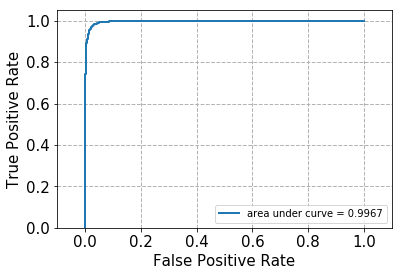

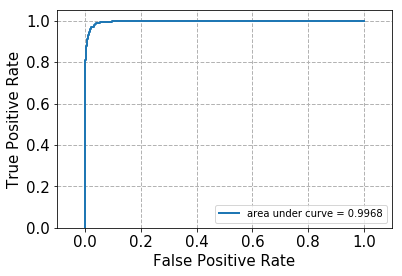

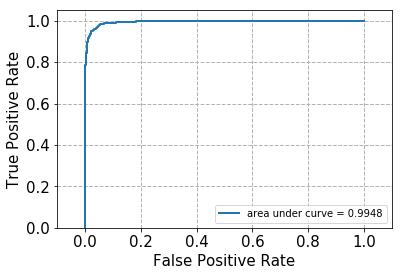

In [28]:
def cross_val(train_X, train_Y, test_X, test_Y):
    from sklearn import svm
    from sklearn.model_selection import cross_val_score
    max_score = 0
    K = 0
    for k in range(-3, 4):
        clf = svm.LinearSVC(C=10 ** k)
        #clf = svm.SVC(kernel='linear', C=10**k, probability=True)
        scores = cross_val_score(clf, train_X, train_Y, cv=5)
        print(k, sum(scores)/5)
        if sum(scores)/5 > max_score:
            max_score = sum(scores)/5
            K = k
    print("K = ", K)
    print("max_scores = ", max_score)
    clf = svm.LinearSVC(C=10 ** K).fit(train_X, train_Y)
    predict_Y = clf.predict(test_X)
    prob_score = np.vstack((np.zeros(len(test_X)), clf.decision_function(test_X))).T
    measurement(prob_score, test_Y, predict_Y)
    print('-' * 20)

print("LSI, min_df=2")
cross_val(W_train_svd_2, train_Y, W_test_svd_2, test_Y)
print("LSI, min_df=5")
cross_val(W_train_svd_5, train_Y, W_test_svd_5, test_Y)
print("NMF, min_df=2")
cross_val(W_train_nmf_2, train_Y, W_test_nmf_2, test_Y)

# (g) 

[[1382  178]
 [  19 1571]]
accuracy =  0.9374603174603174
recall =  0.9880503144654088
precision =  0.8982275586049171


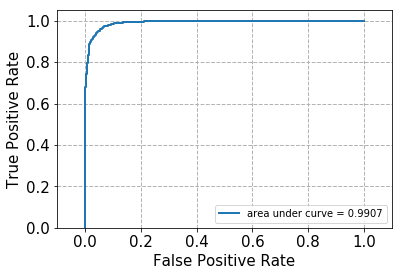

In [29]:
def Naive_Bayes(train_X, train_Y, test_X, test_Y):
    from sklearn.naive_bayes import MultinomialNB
    clf = MultinomialNB()
    clf.fit(train_X, train_Y)
    predict_Y = clf.predict(test_X)
    prob_score = clf.predict_proba(test_X)
    measurement(prob_score, test_Y, predict_Y)
    
Naive_Bayes(W_train_nmf_2, train_Y, W_test_nmf_2, test_Y)

# (h)

LSI, min_df=2
[[1487   73]
 [  34 1556]]
accuracy =  0.966031746031746
recall =  0.9786163522012579
precision =  0.9551872314303254
--------------------
LSI, min_df=5
[[1494   66]
 [  31 1559]]
accuracy =  0.9692063492063492
recall =  0.980503144654088
precision =  0.9593846153846154
--------------------
NMF, min_df=2
[[1442  118]
 [  51 1539]]
accuracy =  0.9463492063492064
recall =  0.9679245283018868
precision =  0.9287869643934822
--------------------


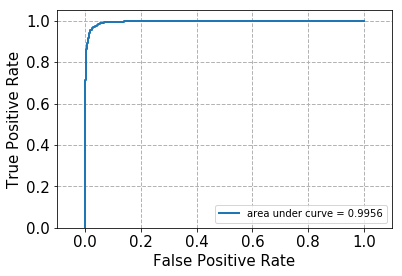

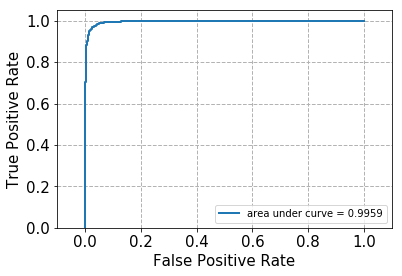

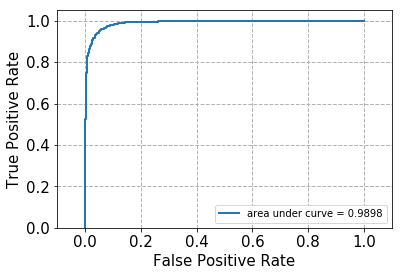

In [30]:
def Logistic(train_X, train_Y, test_X, test_Y):
    from sklearn.linear_model import LogisticRegression
    clf = LogisticRegression()
    clf.fit(train_X, train_Y)
    predict_Y = clf.predict(test_X)
    prob_score = clf.predict_proba(test_X)
    measurement(prob_score, test_Y, predict_Y)
    print('-'*20)
    
print("LSI, min_df=2")
Logistic(W_train_svd_2, train_Y, W_test_svd_2, test_Y)
print("LSI, min_df=5")
Logistic(W_train_svd_5, train_Y, W_test_svd_5, test_Y)
print("NMF, min_df=2")
Logistic(W_train_nmf_2, train_Y, W_test_nmf_2, test_Y)

# (i)

In [31]:
def sub_log(pen, k, train_X, train_Y, test_X, test_Y):
    from sklearn.linear_model import LogisticRegression
    clf = LogisticRegression(penalty=pen, C=10 ** k)
    clf.fit(train_X, train_Y)
    predict_Y = clf.predict(test_X)
    prob_score = clf.predict_proba(test_X)
    measurement(prob_score, test_Y, predict_Y)
    
def Logistic_with_reg(train_X, train_Y, test_X, test_Y):
    
    for k in range(-2, 3):
        print("LogisticRegression(penalty='l1'), C={}".format(10 ** k))
        sub_log("l1", k, train_X, train_Y, test_X, test_Y)
        print("LogisticRegression(penalty='l2'), C={}".format(10 ** k))
        sub_log("l2", k, train_X, train_Y, test_X, test_Y)


LSI, min_df=2
LogisticRegression(penalty='l1'), C=0.01
[[1479   81]
 [ 229 1361]]
accuracy =  0.9015873015873016
recall =  0.8559748427672956
precision =  0.9438280166435506
LogisticRegression(penalty='l2'), C=0.01
[[1384  176]
 [   9 1581]]
accuracy =  0.9412698412698413
recall =  0.9943396226415094
precision =  0.8998292544109278
LogisticRegression(penalty='l1'), C=0.1
[[1465   95]
 [  46 1544]]
accuracy =  0.9552380952380952
recall =  0.9710691823899371
precision =  0.9420378279438683
LogisticRegression(penalty='l2'), C=0.1
[[1478   82]
 [  34 1556]]
accuracy =  0.9631746031746031
recall =  0.9786163522012579
precision =  0.9499389499389499
LogisticRegression(penalty='l1'), C=1
[[1496   64]
 [  32 1558]]
accuracy =  0.9695238095238096
recall =  0.979874213836478
precision =  0.9605425400739828
LogisticRegression(penalty='l2'), C=1
[[1487   73]
 [  34 1556]]
accuracy =  0.966031746031746
recall =  0.9786163522012579
precision =  0.9551872314303254
LogisticRegression(penalty='l1'), C=

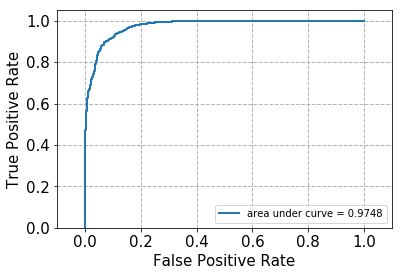

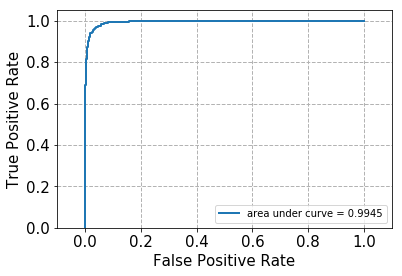

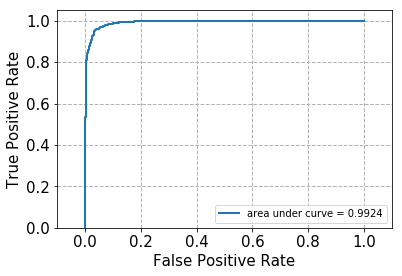

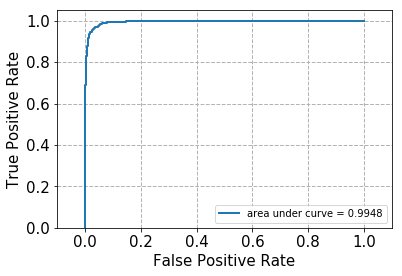

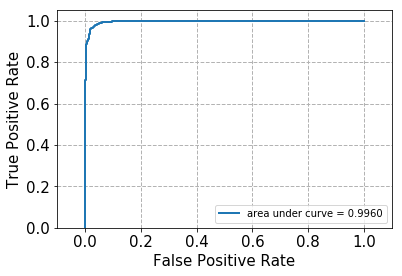

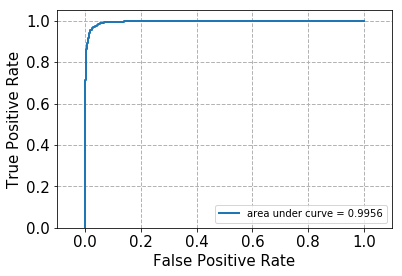

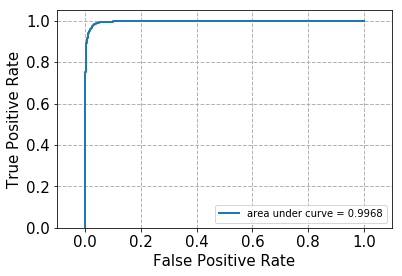

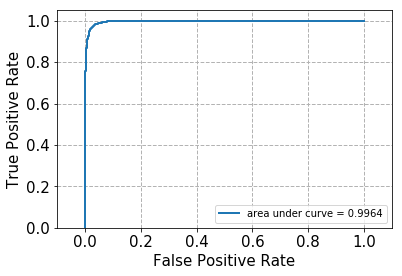

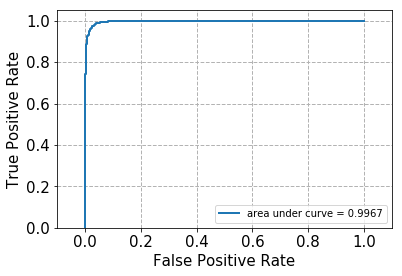

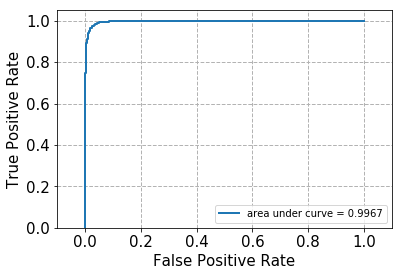

In [32]:
print("LSI, min_df=2")
Logistic_with_reg(W_train_svd_2, train_Y, W_test_svd_2, test_Y)

LSI, min_df=5
LogisticRegression(penalty='l1'), C=0.01
[[1454  106]
 [ 161 1429]]
accuracy =  0.9152380952380952
recall =  0.8987421383647799
precision =  0.9309446254071662
LogisticRegression(penalty='l2'), C=0.01
[[1398  162]
 [  11 1579]]
accuracy =  0.9450793650793651
recall =  0.9930817610062893
precision =  0.9069500287191269
LogisticRegression(penalty='l1'), C=0.1
[[1456  104]
 [  56 1534]]
accuracy =  0.9492063492063492
recall =  0.9647798742138365
precision =  0.9365079365079365
LogisticRegression(penalty='l2'), C=0.1
[[1481   79]
 [  29 1561]]
accuracy =  0.9657142857142857
recall =  0.9817610062893082
precision =  0.9518292682926829
LogisticRegression(penalty='l1'), C=1
[[1495   65]
 [  36 1554]]
accuracy =  0.967936507936508
recall =  0.9773584905660377
precision =  0.9598517603458925
LogisticRegression(penalty='l2'), C=1
[[1494   66]
 [  31 1559]]
accuracy =  0.9692063492063492
recall =  0.980503144654088
precision =  0.9593846153846154
LogisticRegression(penalty='l1'), C=

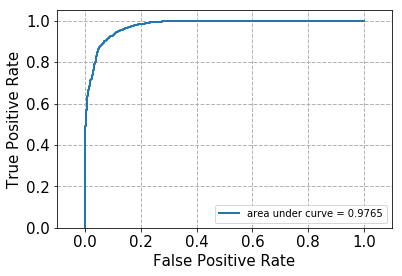

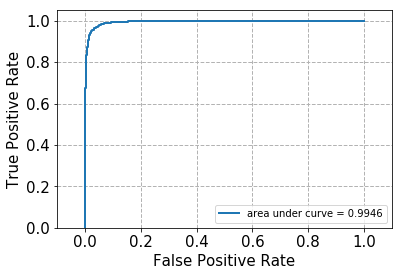

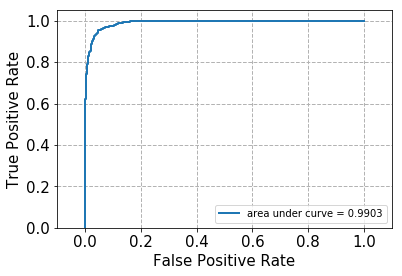

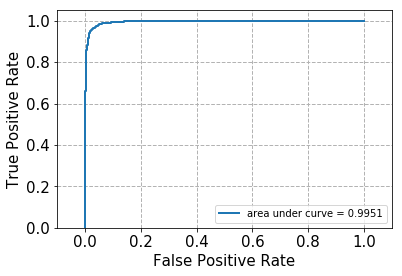

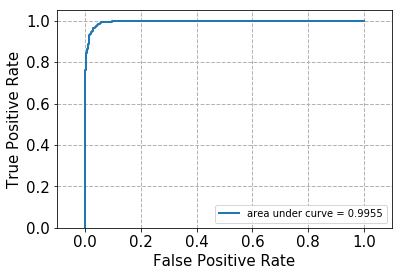

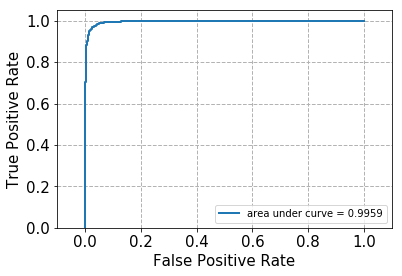

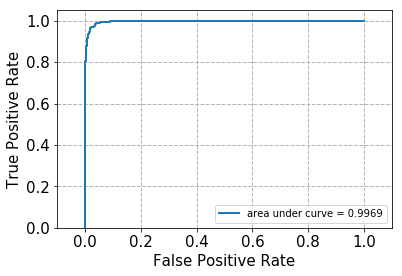

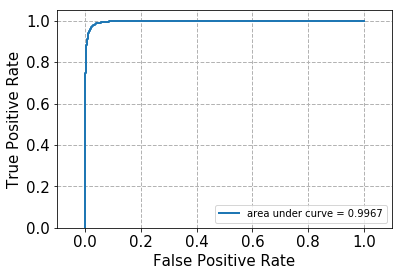

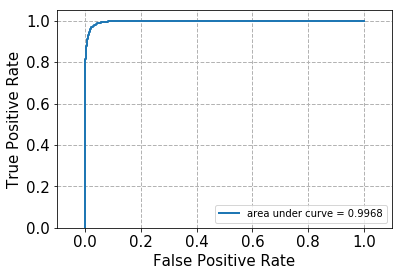

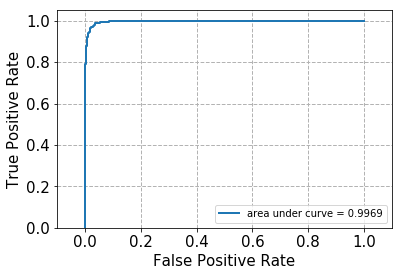

In [33]:
print("LSI, min_df=5")
Logistic_with_reg(W_train_svd_5, train_Y, W_test_svd_5, test_Y)

NMF, min_df=2
LogisticRegression(penalty='l1'), C=0.01
[[1560    0]
 [1590    0]]
accuracy =  0.49523809523809526
recall =  0.0
precision =  0.0
LogisticRegression(penalty='l2'), C=0.01
[[  15 1545]
 [   0 1590]]
accuracy =  0.5095238095238095
recall =  1.0
precision =  0.507177033492823
LogisticRegression(penalty='l1'), C=0.1
[[1062  498]
 [ 504 1086]]
accuracy =  0.6819047619047619
recall =  0.6830188679245283
precision =  0.6856060606060606
LogisticRegression(penalty='l2'), C=0.1


C:\Users\IronTech\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[[1179  381]
 [   7 1583]]
accuracy =  0.8768253968253968
recall =  0.9955974842767296
precision =  0.8060081466395111
LogisticRegression(penalty='l1'), C=1
[[1488   72]
 [  42 1548]]
accuracy =  0.9638095238095238
recall =  0.9735849056603774
precision =  0.9555555555555556
LogisticRegression(penalty='l2'), C=1
[[1442  118]
 [  51 1539]]
accuracy =  0.9463492063492064
recall =  0.9679245283018868
precision =  0.9287869643934822
LogisticRegression(penalty='l1'), C=10
[[1497   63]
 [  48 1542]]
accuracy =  0.9647619047619047
recall =  0.969811320754717
precision =  0.9607476635514018
LogisticRegression(penalty='l2'), C=10
[[1473   87]
 [  53 1537]]
accuracy =  0.9555555555555556
recall =  0.9666666666666667
precision =  0.9464285714285714
LogisticRegression(penalty='l1'), C=100
[[1501   59]
 [  53 1537]]
accuracy =  0.9644444444444444
recall =  0.9666666666666667
precision =  0.9630325814536341
LogisticRegression(penalty='l2'), C=100
[[1483   77]
 [  49 1541]]
accuracy =  0.96
recall = 

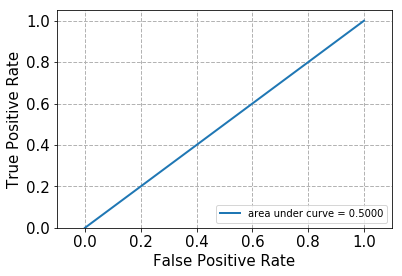

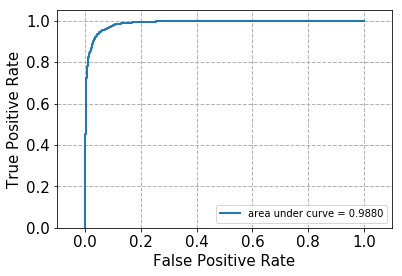

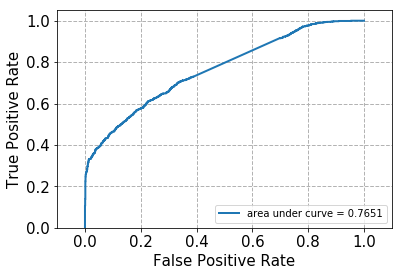

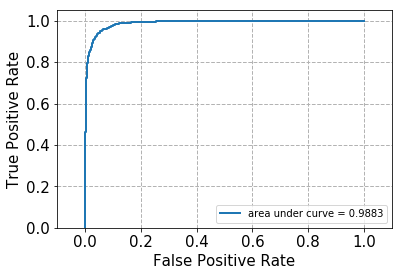

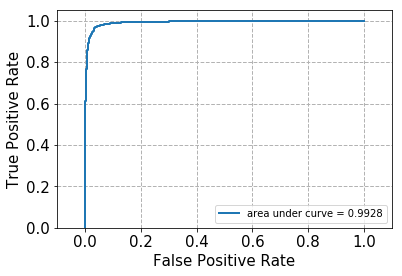

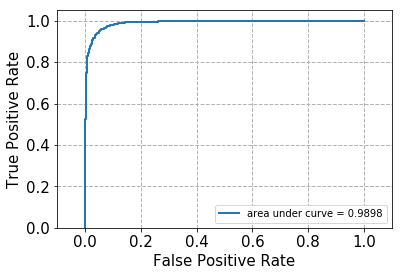

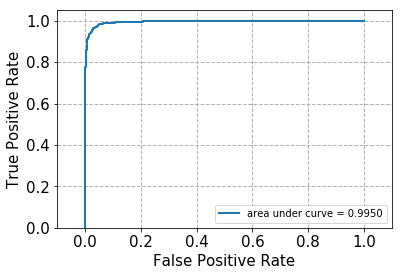

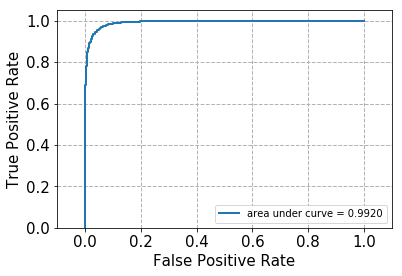

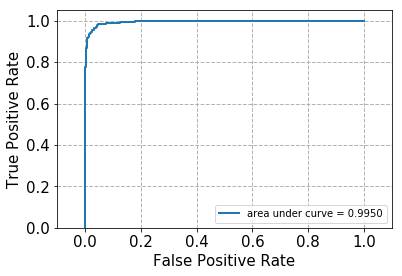

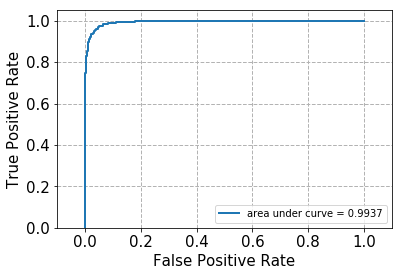

In [34]:
print("NMF, min_df=2")
Logistic_with_reg(W_train_nmf_2, train_Y, W_test_nmf_2, test_Y)

# (j)

In [35]:
categories=["comp.sys.ibm.pc.hardware", "comp.sys.mac.hardware", "misc.forsale", "soc.religion.christian"]
multi_train, multi_test = fetch_data(categories)
X_train_counts_m, X_test_counts_m = Counter(2, multi_train, multi_test)
X_train_tfidf_m, X_test_tfidf_m = tfidf(X_train_counts_m, X_test_counts_m)
W_train_svd_m, W_test_svd_m = SVD(X_train_tfidf_m, X_test_tfidf_m)
W_train_nmf_m, W_test_nmf_m = NMF(X_train_tfidf_m, X_test_tfidf_m)

train_Y_m = multi_train.target
test_Y_m = multi_test.target


min_df = 2
Shape of train = (2352, 12222)
Shape of test = (1565, 12222)
(2352, 12222)


In [36]:
def Multi_Measurement(test_Y, predict_Y):
    from sklearn.metrics import confusion_matrix
    print(confusion_matrix(test_Y, predict_Y))
    from sklearn.metrics import accuracy_score
    print("accuracy = ", accuracy_score(test_Y, predict_Y))
    from sklearn.metrics import recall_score
    print("recall = ", recall_score(test_Y, predict_Y, average=None))
    from sklearn.metrics import precision_score
    print("precision = ", precision_score(test_Y, predict_Y, average=None))


In [37]:

def Multi_SVM(train_X, train_Y, test_X, test_Y):
    from sklearn import svm
    from sklearn.multiclass import OneVsOneClassifier
    from sklearn.multiclass import OneVsRestClassifier
    #one VS one
    print("One vs One")
    clf = OneVsOneClassifier(svm.LinearSVC(), -1)
    #clf = svm.SVC(decision_function_shape='ovo')
    clf.fit(train_X, train_Y)
    predict_Y = clf.predict(test_X)
    Multi_Measurement(test_Y, predict_Y)
    print('-'*20)
    
    #one VS rest
    print("One vs Rest")
    clf = OneVsRestClassifier(svm.LinearSVC(), -1)
    #clf = svm.SVC(decision_function_shape='ovr')
    clf.fit(train_X, train_Y)
    predict_Y_ovr = clf.predict(test_X)
    Multi_Measurement(test_Y, predict_Y_ovr)
    print('-'*20)
    
print("LSI, min_df=2")
Multi_SVM(W_train_svd_m, train_Y_m, W_test_svd_m, test_Y_m)
print("NMF, min_df=2")
Multi_SVM(W_train_nmf_m, train_Y_m, W_test_nmf_m, test_Y_m)


LSI, min_df=2
One vs One
[[327  42  23   0]
 [ 41 321  22   1]
 [ 23  17 349   1]
 [  7   2   3 386]]
accuracy =  0.8837060702875399
recall =  [0.83418367 0.83376623 0.89487179 0.96984925]
precision =  [0.82160804 0.84031414 0.8790932  0.99484536]
--------------------
One vs Rest
[[324  45  22   1]
 [ 32 326  26   1]
 [ 22  17 350   1]
 [  6   1   2 389]]
accuracy =  0.8875399361022365
recall =  [0.82653061 0.84675325 0.8974359  0.97738693]
precision =  [0.84375    0.83804627 0.875      0.99234694]
--------------------
NMF, min_df=2
One vs One
[[311  62  19   0]
 [ 72 289  23   1]
 [ 31  29 330   0]
 [ 10  13   6 369]]
accuracy =  0.8300319488817891
recall =  [0.79336735 0.75064935 0.84615385 0.92713568]
precision =  [0.73349057 0.73536896 0.87301587 0.9972973 ]
--------------------
One vs Rest
[[308  58  26   0]
 [ 66 284  33   2]
 [ 23  21 343   3]
 [  4   4   6 384]]
accuracy =  0.8428115015974441
recall =  [0.78571429 0.73766234 0.87948718 0.96482412]
precision =  [0.7680798  0.773

In [38]:
def Multi_NB(train_X, train_Y, test_X, test_Y):
    from sklearn.naive_bayes import MultinomialNB
    clf = MultinomialNB()
    clf.fit(train_X, train_Y)
    predict_Y = clf.predict(test_X)
    Multi_Measurement(test_Y, predict_Y)
    print('-'*20)

Multi_NB(W_train_nmf_m, train_Y_m, W_test_nmf_m, test_Y_m)


[[331  25  36   0]
 [114 218  51   2]
 [ 38  12 337   3]
 [  3   1   2 392]]
accuracy =  0.8166134185303514
recall =  [0.84438776 0.56623377 0.86410256 0.98492462]
precision =  [0.68106996 0.8515625  0.79107981 0.98740554]
--------------------
